Install Necessary Packages

In [1]:
# Pandas package

!pip install pandas
import pandas as pd

# Scikit learn package
!pip install --upgrade scikit-learn


Read the dataset

In [2]:
df_sales = pd.read_excel("/content/Pizza_Sale.xlsx")
df_ingredient = pd.read_excel("/content/Pizza_ingredients.xlsx")

In [3]:
df_sales

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df_ingredient

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


Data Preprocessing

In [5]:
df_sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,7
pizza_size,0
pizza_category,23


Missing Value Treatment

In [6]:
# Total Price

df_sales['total_price'] = df_sales['total_price'].fillna(df_sales['unit_price'] * df_sales['quantity'])#

In [7]:
# Pizza Name ID

name_id = df_sales[['pizza_name', 'pizza_name_id']].dropna().drop_duplicates()
name_id_map = name_id.set_index('pizza_name')['pizza_name_id'].to_dict()

df_sales['pizza_name_id'] = df_sales['pizza_name_id'].fillna(df_sales['pizza_name'].map(name_id_map))

In [8]:
# Pizza Category

category = df_sales[['pizza_name', 'pizza_category']].dropna().drop_duplicates()
category_map = category.set_index('pizza_name')['pizza_category'].to_dict()

# Fill missing pizza_category values in df_sales using the mapping
df_sales['pizza_category'] = df_sales['pizza_category'].fillna(df_sales['pizza_name'].map(category_map))


In [9]:
# Pizza Name

# Create a mapping of pizza_name_id to pizza_name from df_sales
name = df_sales[['pizza_name_id', 'pizza_name']].dropna().drop_duplicates()
name_map = name.set_index('pizza_name_id')['pizza_name'].to_dict()

# Fill missing pizza_name values in df_sales using the mapping
df_sales['pizza_name'] = df_sales['pizza_name'].fillna(df_sales['pizza_name_id'].map(name_map))


In [10]:
# Pizza Ingredients

# Create a mapping of pizza_name to pizza_ingredients from df_sales
ingredients = df_sales[['pizza_name', 'pizza_ingredients']].dropna().drop_duplicates()
ingredients_map = ingredients.set_index('pizza_name')['pizza_ingredients'].to_dict()

# Fill missing pizza_ingredients values in df_sales using the mapping
df_sales['pizza_ingredients'] = df_sales['pizza_ingredients'].fillna(df_sales['pizza_name'].map(ingredients_map))


In [11]:
# Rename Pizza Ingredients as Pizza Ingredients list

df_sales = df_sales.rename(columns = {'pizza_ingredients': 'pizza_ingredients_list'})

In [12]:
df_sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [13]:
# Items_Qty_In_Grams in Ingredient dataset

df_ingredient['Items_Qty_In_Grams'] = df_ingredient['Items_Qty_In_Grams'].fillna(0)

In [14]:
df_ingredient.isnull().sum()

,0
pizza_name_id,0
pizza_name,0
pizza_ingredients,0
Items_Qty_In_Grams,0


Merge the datasets

In [15]:
df = df_sales.merge(df_ingredient[['pizza_name_id', 'pizza_ingredients', 'Items_Qty_In_Grams']], on='pizza_name_id', how='left')
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients_list,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Sliced Ham,0.0
1,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Pineapple,30.0
2,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Mozzarella Cheese,20.0
3,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Pepperoni,40.0
4,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Mushrooms,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267571,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,Red Peppers,5.0
267572,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,Green Peppers,20.0
267573,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,Tomatoes,10.0
267574,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,Red Onions,20.0


In [16]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients_list,pizza_name,pizza_ingredients,Items_Qty_In_Grams


In [17]:
df.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [18]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients_list', 'pizza_name',
       'pizza_ingredients', 'Items_Qty_In_Grams'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267576 entries, 0 to 267575
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pizza_id                267576 non-null  int64  
 1   order_id                267576 non-null  int64  
 2   pizza_name_id           267576 non-null  object 
 3   quantity                267576 non-null  int64  
 4   order_date              267576 non-null  object 
 5   order_time              267576 non-null  object 
 6   unit_price              267576 non-null  float64
 7   total_price             267576 non-null  float64
 8   pizza_size              267576 non-null  object 
 9   pizza_category          267576 non-null  object 
 10  pizza_ingredients_list  267576 non-null  object 
 11  pizza_name              267576 non-null  object 
 12  pizza_ingredients       267576 non-null  object 
 13  Items_Qty_In_Grams      267576 non-null  float64
dtypes: float64(3), int64

In [20]:
# Convert order_date to datetime format

df['order_date'] = pd.to_datetime(df['order_date'])

EDA

In [21]:
# Missingno package installation

!pip install missingno
import missingno as msno

# Matplotlib package installation

!pip install matplotlib
import matplotlib.pyplot as plt

# Seaborn package installation

!pip install seaborn
import seaborn as sns

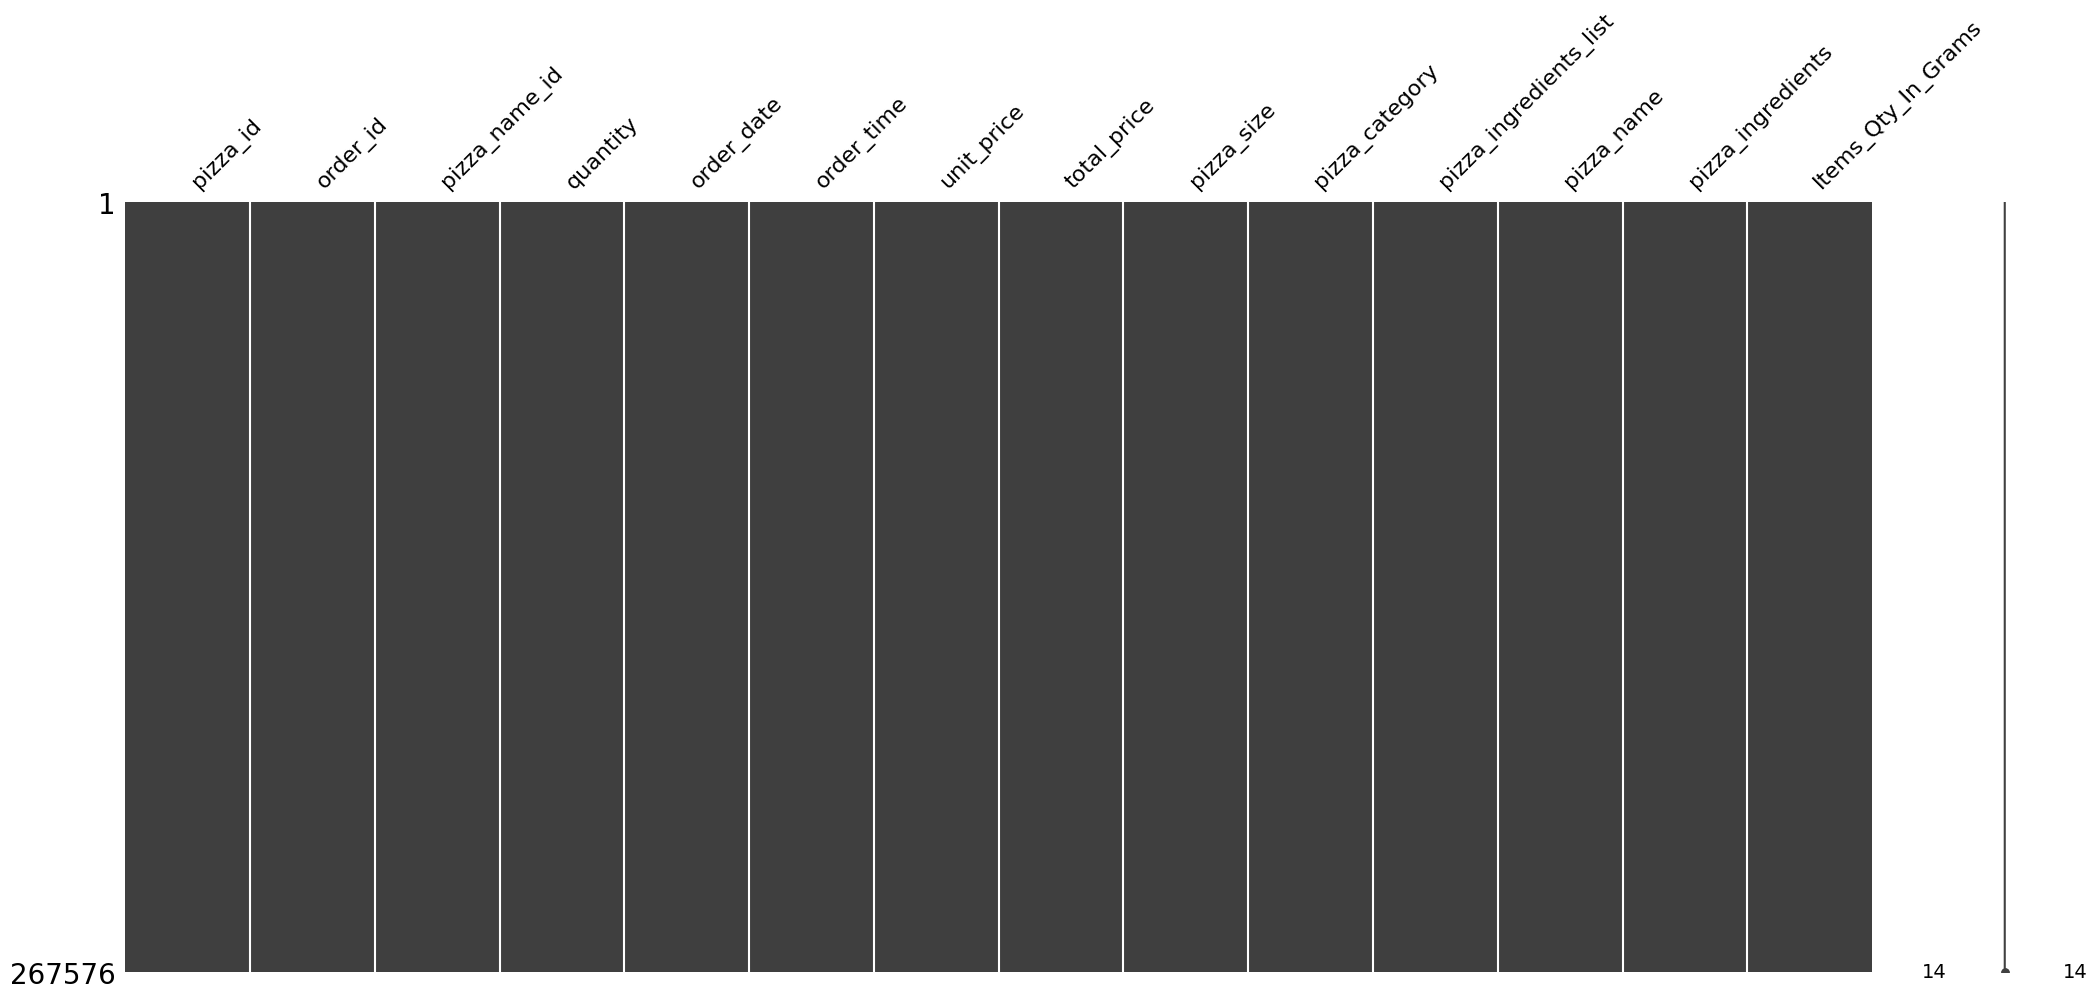

In [22]:
msno.matrix(df)
plt.show()

<ipython-input-23-af4e48aa4162>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='total_price', data=monthly_sales, palette='Blues_d')


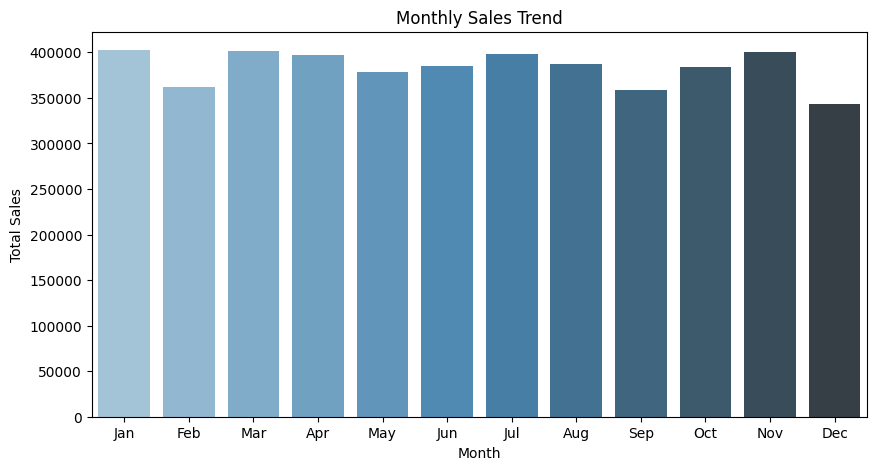

In [23]:
# Montly Sales Trend

df['month'] = df['order_date'].dt.month

# Aggregate sales by month
monthly_sales = df.groupby('month')['total_price'].sum().reset_index()

# Plot sales by month
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='total_price', data=monthly_sales, palette='Blues_d')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


<ipython-input-24-f2fc00375eb0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='total_price', data=weekly_sales, palette='coolwarm')


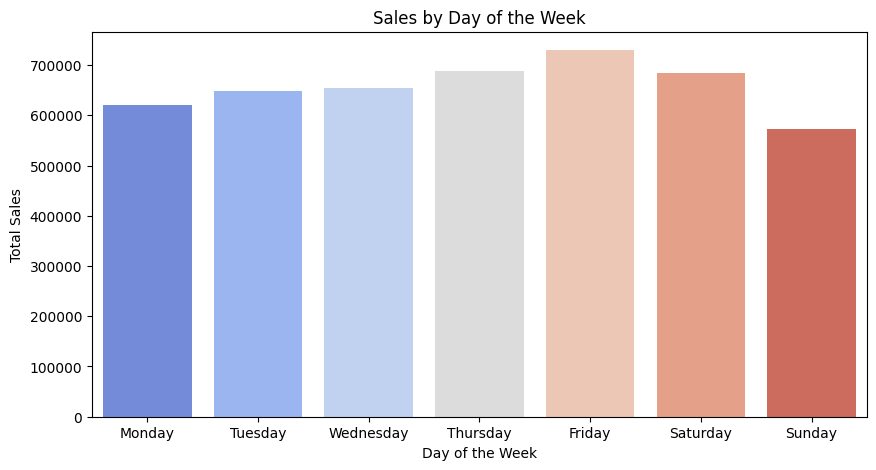

In [24]:
# Weakly sales trend

df['day_of_week'] = df['order_date'].dt.day_name()

# Aggregate sales by day of the week
weekly_sales = df.groupby('day_of_week')['total_price'].sum().reset_index()

# Sort days in order
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales['day_of_week'] = pd.Categorical(weekly_sales['day_of_week'], categories=week_order, ordered=True)
weekly_sales = weekly_sales.sort_values('day_of_week')

# Plot sales by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='total_price', data=weekly_sales, palette='coolwarm')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


<ipython-input-25-b3dd835b4f9d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pizza_size', y='total_price', data=size_sales, palette='Set2')


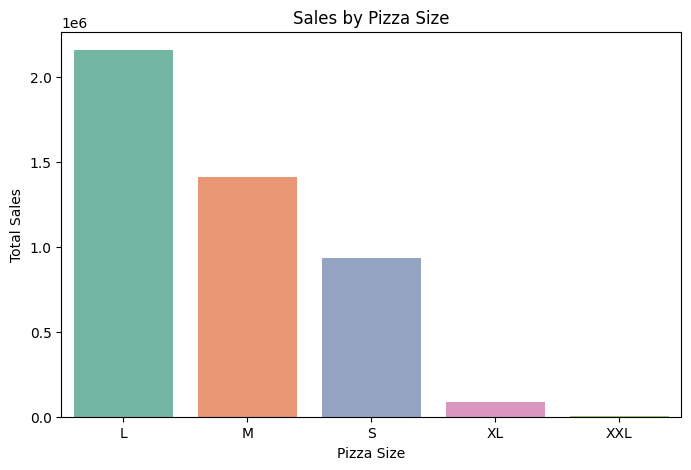

In [25]:
# Sales by pizza size

size_sales = df.groupby('pizza_size')['total_price'].sum().reset_index()

# Plot sales by pizza size
plt.figure(figsize=(8, 5))
sns.barplot(x='pizza_size', y='total_price', data=size_sales, palette='Set2')
plt.title('Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales')
plt.show()


<ipython-input-26-c4e4b810ba13>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='pizza_category', x='total_price', data=category_sales.sort_values('total_price', ascending=False), palette='viridis')


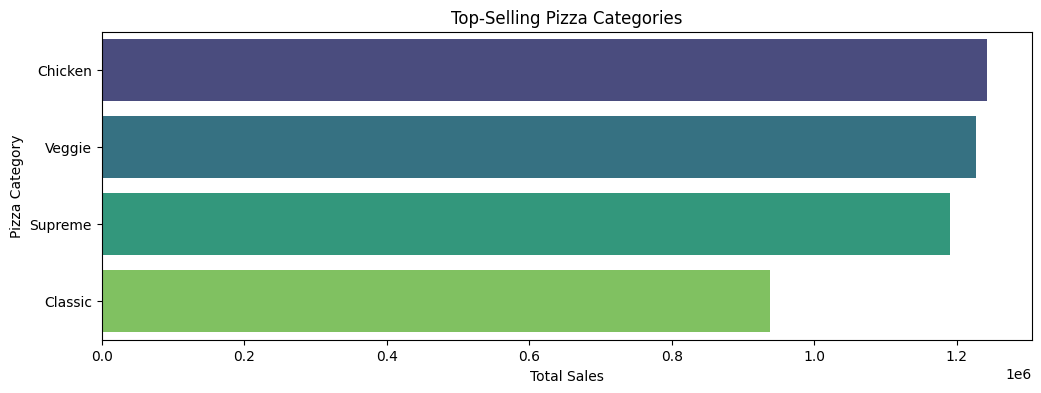

In [26]:
# Sales by pizza category (Price)

category_sales = df.groupby('pizza_category')['total_price'].sum().reset_index()

# Plot top-selling categories
plt.figure(figsize=(12, 4))
sns.barplot(y='pizza_category', x='total_price', data=category_sales.sort_values('total_price', ascending=False), palette='viridis')
plt.title('Top-Selling Pizza Categories')
plt.xlabel('Total Sales')
plt.ylabel('Pizza Category')
plt.show()


<ipython-input-27-f79eed1ca567>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='pizza_category', x='quantity', data=category_sales.sort_values('quantity', ascending=False), palette='viridis')


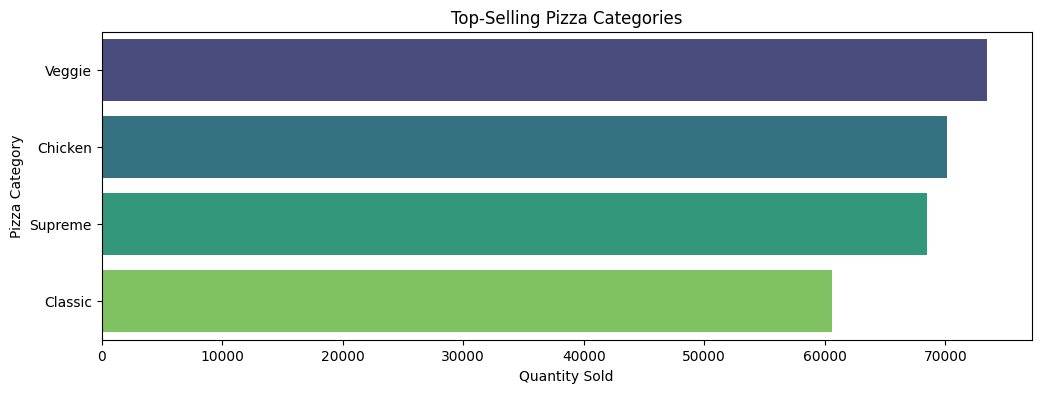

In [27]:
# Sales by pizza category (Quantity)

category_sales = df.groupby('pizza_category')['quantity'].sum().reset_index()

# Plot top-selling categories
plt.figure(figsize=(12, 4))
sns.barplot(y='pizza_category', x='quantity', data=category_sales.sort_values('quantity', ascending=False), palette='viridis')
plt.title('Top-Selling Pizza Categories')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Category')
plt.show()


<ipython-input-28-42ba82bfe5fb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='pizza_ingredients', x='Items_Qty_In_Grams', data=ingredient_demand, palette='magma')


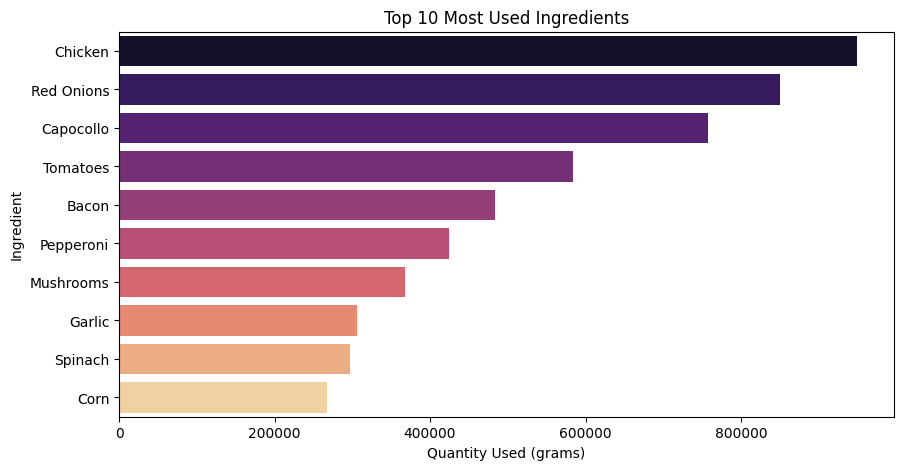

In [28]:
# Aggregate ingredient usage

ingredient_demand = df.groupby('pizza_ingredients')['Items_Qty_In_Grams'].sum().reset_index()

# Sort top 10 ingredients
ingredient_demand = ingredient_demand.sort_values('Items_Qty_In_Grams', ascending=False).head(10)

# Plot ingredient demand
plt.figure(figsize=(10, 5))
sns.barplot(y='pizza_ingredients', x='Items_Qty_In_Grams', data=ingredient_demand, palette='magma')
plt.title('Top 10 Most Used Ingredients')
plt.xlabel('Quantity Used (grams)')
plt.ylabel('Ingredient')
plt.show()


Feature Engineering

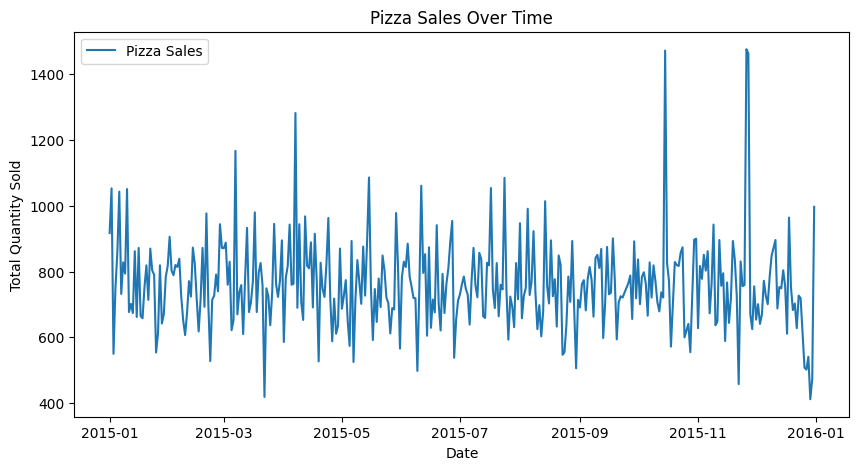

In [29]:
# Aggregate sales data ('quantity')
df_sales = df.groupby('order_date')['quantity'].sum().reset_index()

# Set the date as index
df_sales.set_index('order_date', inplace=True)

# Plot time series
plt.figure(figsize=(10,5))
plt.plot(df_sales, label='Pizza Sales')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.title('Pizza Sales Over Time')
plt.legend()
plt.show()

In [30]:
# Promotion Period

import numpy as np

# Extract day of the week (Monday=0, Sunday=6)
df['week_days'] = df['order_date'].dt.dayofweek

# Mark weekends (Saturday=5, Sunday=6) as promotional periods
df['is_promotion'] = np.where(df['week_days'] >= 5, 1, 0)

# Mark end-of-month (assumption: last 5 days are promotional)
df['is_end_of_month'] = np.where(df['order_date'].dt.day >= 26, 1, 0)

# Combine both conditions
df['promotion_period'] = df[['is_promotion', 'is_end_of_month']].max(axis=1)

# Drop unnecessary columns
df.drop(columns=['is_promotion', 'is_end_of_month'], inplace=True)

# Check data
df[['order_date', 'promotion_period']].sample(10)


,order_date,promotion_period
192095,2015-09-15,0
42840,2015-02-27,1
77994,2015-04-14,0
75916,2015-12-04,0
45617,2015-03-03,0
30190,2015-10-02,0
165939,2015-10-08,0
20966,2015-01-29,1
160837,2015-03-08,1
167971,2015-08-13,0


In [31]:
# Finding the trend on holidays

from pandas.tseries.holiday import USFederalHolidayCalendar

# Get holiday dates between min and max dates in the dataset
holidays = USFederalHolidayCalendar().holidays(start=df['order_date'].min(),
                                               end=df['order_date'].max())

# Create a holiday flag (1 if holiday, else 0)
df['is_holiday'] = df['order_date'].isin(holidays).astype(int)

# Check data
df[['order_date', 'is_holiday']].sample(5)


,order_date,is_holiday
29144,2015-08-02,0
189409,2015-11-09,0
98815,2015-12-05,0
46171,2015-03-03,0
125214,2015-06-17,0


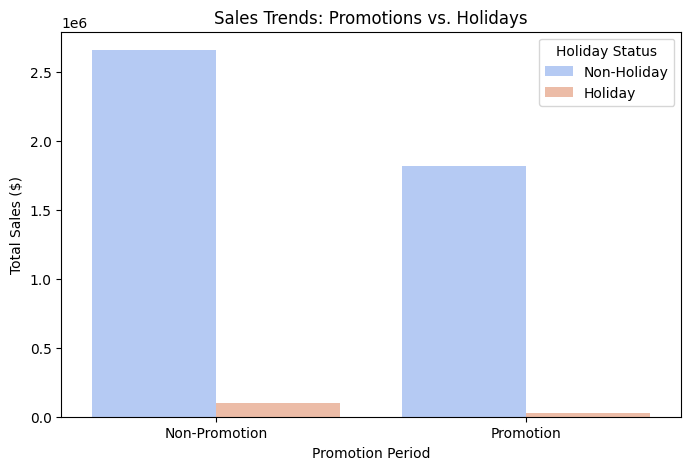

In [32]:
# Sales trend on holiday vs non holiday & promotions vs non promotions

# Aggregate total sales during promotions and holidays
sales_trends = df.groupby(['promotion_period', 'is_holiday'])['total_price'].sum().reset_index()

# Rename for better readability
sales_trends['promotion_period'] = sales_trends['promotion_period'].map({0: 'Non-Promotion', 1: 'Promotion'})
sales_trends['is_holiday'] = sales_trends['is_holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='promotion_period', y='total_price', hue='is_holiday', data=sales_trends, palette='coolwarm')
plt.title("Sales Trends: Promotions vs. Holidays")
plt.xlabel("Promotion Period")
plt.ylabel("Total Sales ($)")
plt.legend(title="Holiday Status")
plt.show()


In [33]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients_list', 'pizza_name',
       'pizza_ingredients', 'Items_Qty_In_Grams', 'month', 'day_of_week',
       'week_days', 'promotion_period', 'is_holiday'],
      dtype='object')

Install the model packages

In [34]:
!pip install pmdarima
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.5 MB/s eta 0:00:00


Model Training (ARIMA)

In [35]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error as mape

# Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregate sales by day
daily_sales = df.groupby('order_date')['quantity'].sum()

# Apply a 7-day moving average to smooth the data
daily_sales_smoothed = daily_sales.rolling(window=7, min_periods=1).mean() # averaging each day’s sales with the past 6 days sales.

# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(daily_sales_smoothed))
train, test = daily_sales_smoothed[:train_size], daily_sales_smoothed[train_size:]

# -------------------------------
# Model Training
# -------------------------------
print("\n Training ARIMA Model...")
stepwise_fit = auto_arima(train, seasonal=False, trace=True)
p, d, q = stepwise_fit.order
print(f"✅ Optimal ARIMA order: p={p}, d={d}, q={q}")

# Train ARIMA model on smoothed training data
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()



 Training ARIMA Model...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2670.786, Time=3.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4611.844, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2675.294, Time=0.72 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2669.497, Time=1.55 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2673.860, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=1.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2677.192, Time=3.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2664.598, Time=2.56 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=2.56 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2669.052, Time=2.99 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2655.378, Time=5.55 sec
 ARIMA(1,0,3)(0,0,0)[0]         

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Evaluation

In [36]:
# -------------------------------
# Evaluation (MAPE Calculation)
# -------------------------------
print("\n Evaluating Model Performance...")
test_predictions = model_fit.forecast(steps=len(test))
mape_score = mape(test, test_predictions) * 100  # Convert to percentage
print(f"Mean Absolute Percentage Error (MAPE): {mape_score:.2f}%")


 Evaluating Model Performance...
Mean Absolute Percentage Error (MAPE): 6.65%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


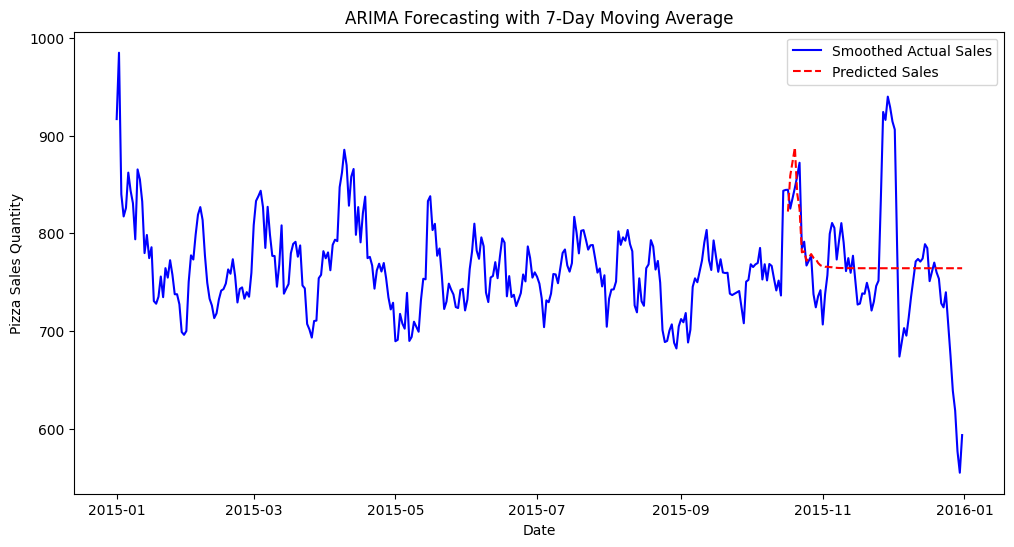

In [37]:
# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_smoothed, label="Smoothed Actual Sales", color='blue')
plt.plot(test.index, test_predictions, label="Predicted Sales", color='red', linestyle="dashed")
plt.legend()
plt.title("ARIMA Forecasting with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Pizza Sales Quantity")
plt.show()

Prediction

In [38]:
# -------------------------------
# Prediction for Next Week
# -------------------------------
print("\n Predicting Next Week's Sales...")
future_dates = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=7)
predicted_sales = model_fit.forecast(steps=7)

# Create a DataFrame for predicted sales
predicted_sales_df = pd.DataFrame({'order_date': future_dates, 'predicted_quantity': predicted_sales})

print("\n Predicted Pizza Sales for Next 7 Days:")
predicted_sales_df


 Predicting Next Week's Sales...

 Predicted Pizza Sales for Next 7 Days:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,order_date,predicted_quantity
286,2016-01-01,822.262868
287,2016-01-02,859.036398
288,2016-01-03,887.939539
289,2016-01-04,840.795817
290,2016-01-05,825.027803
291,2016-01-06,780.514192
292,2016-01-07,781.585489


In [39]:

# -------------------------------
# Step 1: Aggregate Actual Sales Ratio for Pizzas
# -------------------------------
# Get past sales distribution per pizza type
pizza_sales_ratio = (
    df.groupby(['pizza_name_id', 'pizza_size', 'pizza_ingredients'])['quantity']
    .sum()
    .reset_index()
)

# Normalize to get each pizza's proportion of total sales
pizza_sales_ratio['sales_ratio'] = pizza_sales_ratio['quantity'] / pizza_sales_ratio['quantity'].sum()

# -------------------------------
# Step 2: Apply Ratio to Predicted Sales
# -------------------------------
# Calculate total predicted sales for next week
total_predicted_sales = predicted_sales_df['predicted_quantity'].sum()

# Distribute the total predicted sales across different pizza types
pizza_sales_ratio['predicted_quantity'] = pizza_sales_ratio['sales_ratio'] * total_predicted_sales

# -------------------------------
# Step 3: Calculate Ingredient Requirements
# -------------------------------
# Merge with ingredient details
future_sales = pizza_sales_ratio.merge(
    df[['pizza_name_id', 'pizza_size', 'pizza_ingredients', 'Items_Qty_In_Grams']].drop_duplicates(),
    on=['pizza_name_id', 'pizza_size', 'pizza_ingredients'],
    how='left'
)

# Compute total required ingredient quantity
future_sales['Total_Required_Quantity_Grams'] = (
    future_sales['predicted_quantity'] * future_sales['Items_Qty_In_Grams']
)

# -------------------------------
# Step 4: Summarize Ingredient Requirements
# -------------------------------
ingredient_requirements = (
    future_sales.groupby(['pizza_name_id', 'pizza_size', 'pizza_ingredients'], as_index=False)
    .agg({'Total_Required_Quantity_Grams': 'sum'})
)

# Display result
ingredient_requirements

# Save the ingredient requirements to a CSV file
ingredient_requirements.to_csv('ingredient_requirements.csv', index=False)


In [40]:
# -------------------------------
# Step 1: Aggregate Ingredient Requirements
# -------------------------------
ingredient_summary = (
    ingredient_requirements.groupby(['pizza_ingredients'], as_index=False)
    .agg({'Total_Required_Quantity_Grams': 'sum'})
)

# Display result
ingredient_summary

# Save the ingredient summary to a CSV file
ingredient_summary.to_csv('ingredient_summary.csv', index=False)


Save the model

In [41]:
import pickle

# Save the trained ARIMA model
with open("arima_model.pkl", "wb") as model_file:
    pickle.dump(model_fit, model_file)
print("✅ ARIMA model saved successfully!")

✅ ARIMA model saved successfully!
